<a href="https://colab.research.google.com/github/Sekoudioum/Dioumessy_ML/blob/main/projet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

In [7]:
df_train =pd.read_csv('/content/drive/MyDrive/train.csv')
#df_test= pd.read_csv('/content/test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

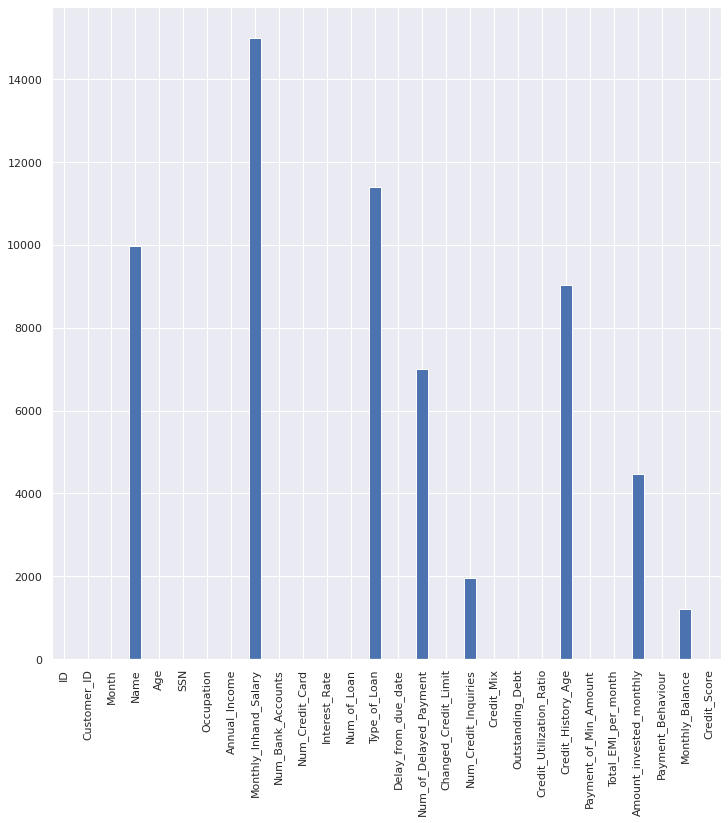

In [10]:
sns.set(rc={'figure.figsize':(12,12)})
df_train.isnull().sum().plot(kind='bar')

In [11]:
df_train.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [13]:
#Dealing With missing datas

In [14]:
def Non_need(df_train):
    to_drop=['ID','SSN','Customer_ID','Name']
    df_train.drop(to_drop, axis=1, inplace=True)

Non_need(df_train)

In [15]:
df_train['Monthly_Inhand_Salary']=df_train.Monthly_Inhand_Salary.fillna(df_train['Monthly_Inhand_Salary'].mean())

In [16]:
pd.set_option('display.max_columns', None)
df_train.head(20)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,June,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,January,28_,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [17]:
df_train['Type_of_Loan']=df_train['Type_of_Loan'].fillna(df_train['Type_of_Loan'].mode()[0])

In [18]:
df_train['Num_of_Delayed_Payment']= df_train['Num_of_Delayed_Payment']\
.str.rstrip('_')\
.astype('float')
df_train['Num_of_Delayed_Payment']= df_train['Num_of_Delayed_Payment'].fillna(df_train['Num_of_Delayed_Payment'].median())

In [19]:
df_train['Num_of_Delayed_Payment'].isna().sum()

0

In [20]:
df_train['Num_Credit_Inquiries']= df_train['Num_Credit_Inquiries'].fillna(df_train['Num_Credit_Inquiries'].mean())

In [21]:
df_train[['Credit_History_Years','Credit_History_Months']]=df_train['Credit_History_Age'].str.split(pat=' and ',expand=True)
df_train['Credit_History_Years']=df_train['Credit_History_Years'].str.rstrip('Years').astype(float)
df_train['Credit_History_Months']=df_train['Credit_History_Months'].str.rstrip('Months').astype(float)
df_train['Credit_History_Years']= df_train['Credit_History_Months']+ (df_train['Credit_History_Months']/12)
df_train.drop(columns=['Credit_History_Age', 'Credit_History_Months'], axis=1, inplace=True)
df_train['Credit_History_Years']= df_train['Credit_History_Years'].fillna(df_train['Credit_History_Years'].median())

In [22]:
df_train['Amount_invested_monthly']= df_train['Amount_invested_monthly']\
.str.rstrip('_')\
.str.lstrip('_')\
.astype(float)
df_train['Amount_invested_monthly']= df_train['Amount_invested_monthly'].fillna(df_train['Amount_invested_monthly'].median())

In [23]:
df_train['Monthly_Balance']= df_train['Monthly_Balance']\
.str.lstrip('_')\
.str.rstrip('_')\
.astype(float)
df_train['Monthly_Balance']= df_train['Monthly_Balance'].fillna(df_train['Monthly_Balance'].mean())

In [24]:
df_train['Age'] = df_train['Age'].str.rstrip('_')
df_train['Age'] = df_train['Age'].str.lstrip('_')
df_train['Age']= df_train['Age'].astype('int')
df_train.drop(df_train[(df_train['Age']<18) | df_train['Age']>80].index, axis=1, inplace=True)

In [25]:
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].str.rstrip('_')
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].str.lstrip('_')
df_train['Num_of_Loan']=df_train['Num_of_Loan'].astype('int')

In [26]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Years'],
      dtype='object')

In [27]:
df_train['Annual_Income']=df_train['Annual_Income'].str.rstrip('_')
df_train['Annual_Income']=df_train['Annual_Income'].str.lstrip('_')
df_train['Annual_Income']=df_train['Annual_Income'].astype(float)

In [28]:
df_train['Outstanding_Debt']= df_train['Outstanding_Debt'].str.rstrip('_')
df_train['Outstanding_Debt']= df_train['Outstanding_Debt'].str.lstrip('_')
df_train['Outstanding_Debt']= df_train['Outstanding_Debt'].astype(float)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      100000 non-null  fl

In [30]:
# def cat_colonne(df_train):
#   cat_col=[]
#   for col in df_train.columns:
#     if df_train[col].dtype=='object':
#       cat_col.append(col)
#   print(cat_col)

In [31]:
# cat_colonne(df_train)

In [32]:
def missing_columns(DataFrame):
  missing_col= DataFrame.isnull().sum()
  return missing_col[missing_col>0]

In [33]:
missing_columns(df_train)

Series([], dtype: int64)

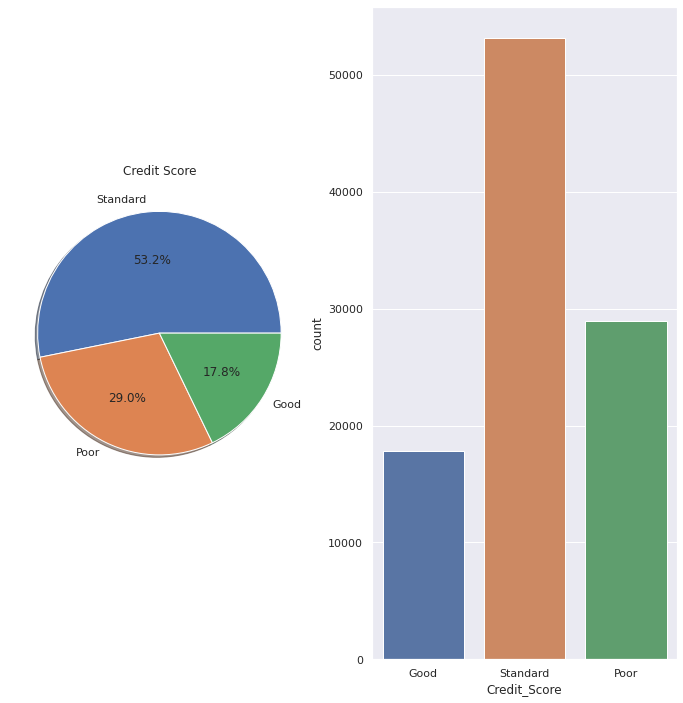

In [34]:
plt.figsize=(8,6)

plt.subplot(1,2,1)

label= df_train.Credit_Score.value_counts().index
label_count= df_train.Credit_Score.value_counts().values
plt.pie(x= label_count, labels=label, radius=1,autopct='%1.1f%%',shadow=True , data=df_train)
plt.title('Credit Score')


plt.subplot(1,2,2)
sns.countplot(x='Credit_Score', data=df_train)
plt.show()

In [35]:
df_train['Credit_Score']= df_train['Credit_Score'].map({'Poor': 1, "Standard":2, 'Good':3})

In [36]:
# clean_train_data= df_train.copy()

In [37]:
df_train['Month'] = df_train['Month'].map({'January':1, 'February':2, 'March':3, 'April':4,
                                                           'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 
                                                           'October':10, 'November':11, 'December':12}
                                                          )

In [38]:
# X= df_train.drop('Credit_Score', axis=1)
# y= df_train['Credit_Score']

In [39]:
cat_col=[col for col in df_train.columns if df_train[col].dtype=='object']

In [40]:
cat_col

['Occupation',
 'Type_of_Loan',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

clean_train_data.drop(clean_train_data[(clean_train_data['Age']<18) | clean_train_data['Age']>80].index, axis=1, inplace=True)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      100000 non-null  fl

In [42]:
#Ordinal Encoding
transformer_train= make_column_transformer(
    (OrdinalEncoder(), cat_col),
    remainder='passthrough')

X_train_transformed= transformer_train.fit_transform(df_train)
X_train_transformed = pd.DataFrame(X_train_transformed,columns=transformer_train.feature_names_in_)

In [43]:
features= X_train_transformed.drop('Credit_Score', axis=1).values
labels= X_train_transformed['Credit_Score'].values

X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

In [44]:
#Standard Scaler
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**ML MODELS : Knn, Logistic Regression, DecisionTreeClassifier, SVM, RandomForestClassifier, SGDClassifier, XGBoost.....**

In [45]:
Models={'Kneighors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM ': LinearSVC(C=.001),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SGD Classifier': SGDClassifier(alpha=1)                  
        }
results=[]
for model in Models.values():
  model.fit(X_train_scaled, y_train)
  kf=KFold(3)
  cross_validation_score= cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(np.mean(cross_validation_score))
print(results)

[0.5941374820604437, 0.669937530678489, 0.5741124693977776, 0.5801499933062132, 0.7709499638342198, 0.532399990635008]


Kneighors : 
 [[3007 2474  318]
 [1939 7635 1061]
 [ 420 1850 1296]]


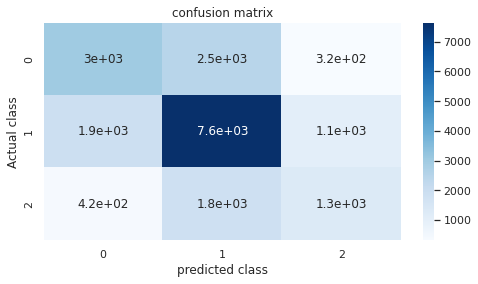

classification report 
               precision    recall  f1-score   support

         1.0       0.56      0.52      0.54      5799
         2.0       0.64      0.72      0.68     10635
         3.0       0.48      0.36      0.42      3566

    accuracy                           0.60     20000
   macro avg       0.56      0.53      0.54     20000
weighted avg       0.59      0.60      0.59     20000

Decision Tree : 
 [[3975 1602  222]
 [1573 7846 1216]
 [ 254 1198 2114]]


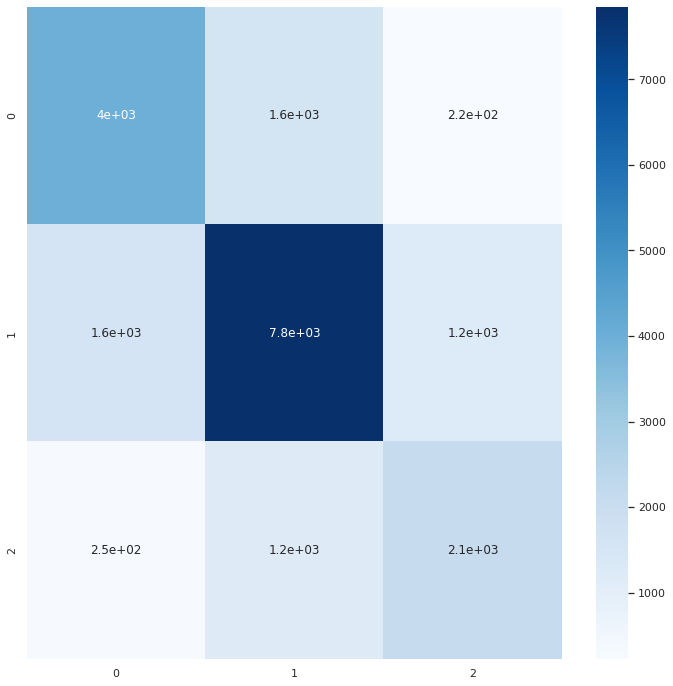

classification report 
               precision    recall  f1-score   support

         1.0       0.69      0.69      0.69      5799
         2.0       0.74      0.74      0.74     10635
         3.0       0.60      0.59      0.59      3566

    accuracy                           0.70     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.70      0.70      0.70     20000

Logistic Regression : 
 [[2206 3409  184]
 [1529 8247  859]
 [  60 2482 1024]]


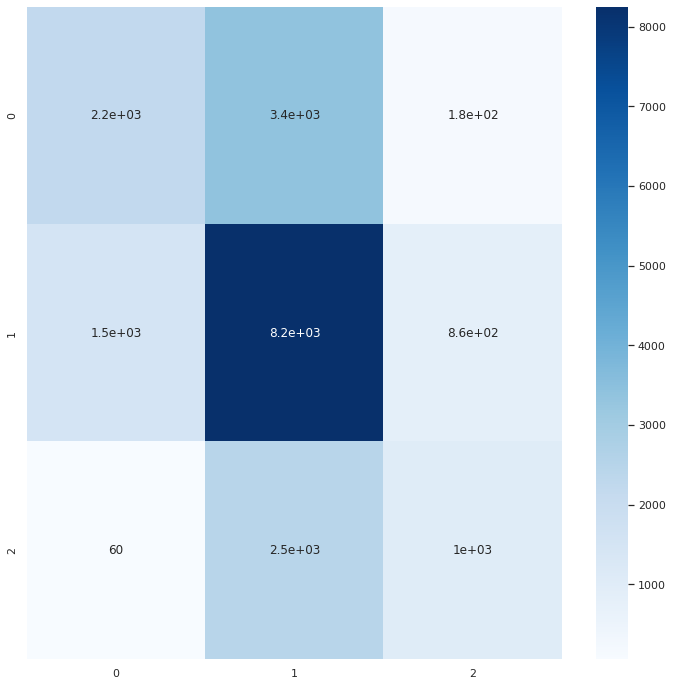

classification report 
               precision    recall  f1-score   support

         1.0       0.58      0.38      0.46      5799
         2.0       0.58      0.78      0.67     10635
         3.0       0.50      0.29      0.36      3566

    accuracy                           0.57     20000
   macro avg       0.55      0.48      0.50     20000
weighted avg       0.57      0.57      0.55     20000

Random Forest : 
 [[4658 1007  134]
 [1206 8640  789]
 [  35  966 2565]]


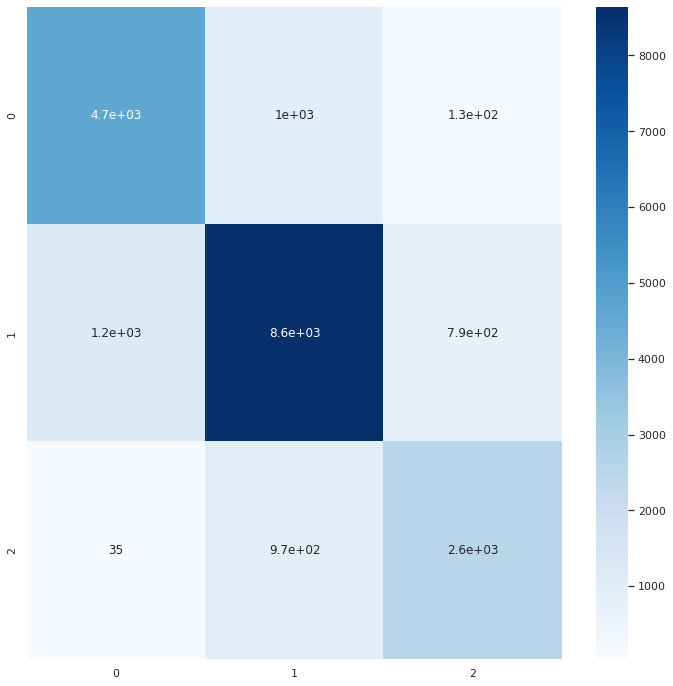

classification report 
               precision    recall  f1-score   support

         1.0       0.79      0.80      0.80      5799
         2.0       0.81      0.81      0.81     10635
         3.0       0.74      0.72      0.73      3566

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000

SGD Classifier : 
 [[   90  5709     0]
 [   78 10557     0]
 [    3  3563     0]]


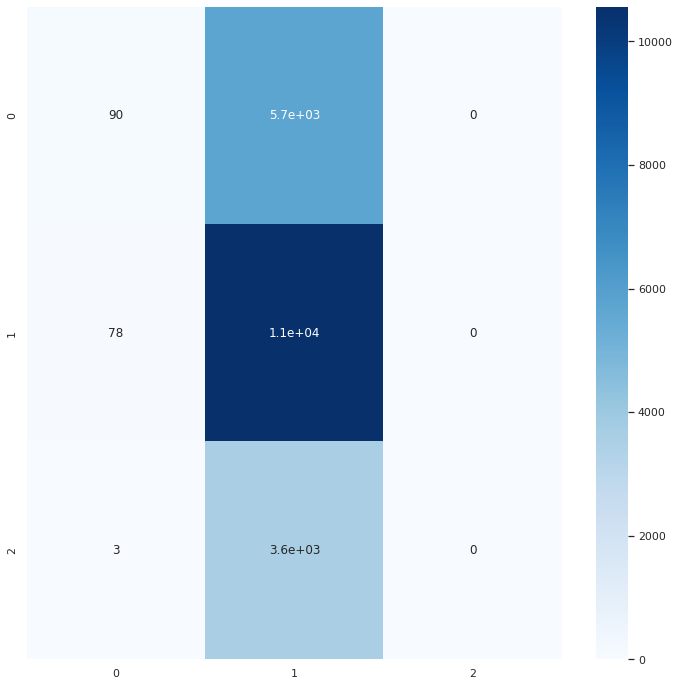

classification report 
               precision    recall  f1-score   support

         1.0       0.53      0.02      0.03      5799
         2.0       0.53      0.99      0.69     10635
         3.0       0.00      0.00      0.00      3566

    accuracy                           0.53     20000
   macro avg       0.35      0.34      0.24     20000
weighted avg       0.44      0.53      0.38     20000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
fig, ax = plt.subplots(figsize=(8,4))
Models=[('Kneighors',KNeighborsClassifier()),
        ('Decision Tree' ,DecisionTreeClassifier()),
        ('Logistic Regression' ,LogisticRegression()),
        ('Random Forest', RandomForestClassifier()),
        ('SGD Classifier', SGDClassifier(alpha=1))
        ]
for name, model in Models:
  model.fit(X_train_scaled, y_train)
  y_pred= model.predict(X_test_scaled)
  matrix_confusion= confusion_matrix(y_test, y_pred)
  print('{} : \n {}'.format(name, matrix_confusion))
  sns.heatmap(matrix_confusion, cmap='Blues',annot=True,cbar=True )
  ax.set_xlabel('predicted class')
  ax.set_ylabel('Actual class')
  ax.set_title('confusion matrix')
  plt.show()
  
  print('classification report \n', classification_report(y_test, y_pred))

  

